<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jen_Banks_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



##1) Write a function

In [19]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# By hand computation

user_prob= 1/1000
nonuser_prob= 1-user_prob

neg_given_user= 0.08
pos_given_user= 1-neg_given_user

prob_user_pos= (pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
prob_user_pos


0.011380504700643244

In [0]:
# Creating a function that will determine the number of times a test should be 
# conducted to get at least 95% probability that he is a user given that he tested positive

def bayes(user_prob, neg_given_user, n):
  posterior_list = []
  for i in range(n):
    pos_given_user= 1-neg_given_user
    nonuser_prob= 1-user_prob
    user_prob=(pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))    
    if user_prob>=0.95:
      print('Reaches approx 95% at n =', len(posterior_list))
      print(' ')
      break
    posterior_list.append(user_prob)
  return posterior_list

1.What is the probability that a person is drunk after one positive breathalyzer test?

In [3]:
# Result after 1 breathalyzer test
bayes(0.001, 0.08, 1)

[0.011380504700643244]

2.What is the probability that a person is drunk after two positive breathalyzer tests?

In [4]:
# Result after 2 breathalyzer test2
bayes(0.001, 0.08, 2)

[0.011380504700643244, 0.11690607734806628]

In [5]:
# Given an arbitrary 100 tests, function will break when 95% is reached.
bayes(0.001, 0.08, 100)

Reaches approx 95% at n = 4
 


[0.011380504700643244,
 0.11690607734806628,
 0.6035517634803313,
 0.9459680554381814]

Plotting the values for specific parameters

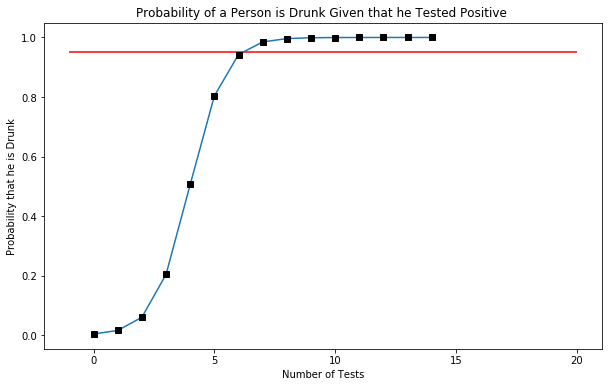

In [7]:
# Given values, can be changed 
#  prior probability = 0.001
#  false positive = 0.2
#  number of tests= 15

def bayes2(user_prob, neg_given_user, n):
  posterior_list = []
  for i in range(n):
    pos_given_user= 1-neg_given_user
    nonuser_prob= 1-user_prob
    user_prob=(pos_given_user*user_prob)/((pos_given_user*user_prob)+(neg_given_user*nonuser_prob))
             
    posterior_list.append(user_prob)

  return posterior_list

vals=list(bayes2(0.001,0.2,15))

plt.figure(figsize=(10,6))

plt.plot(vals,)
plt.plot(vals, 'ks')

plt.xlabel('Number of Tests')
plt.ylabel('Probability that he is Drunk')
plt.title('Probability of a Person is Drunk Given that he Tested Positive ')

plt.hlines(xmin=-1, xmax= 20, y=0.95, color='r', label ='95%')     # 95% marker

plt.show();

##2) Explore scipy.stats.bayes_mvs

In [0]:
# Preparing column headers for dataframe

column_headers= ['party',
                   'handicapped-infants', 'water-project-cost-sharing',
                   'adoption-of-the-budget-resolution',
                   'physician-fee-freeze',
                   'el-salvador-aid',
                   'religious-groups-in-schools',
                   'anti-satellite-test-ban',
                   'aid-to-nicaraguan-contras',
                   'mx-missile',
                   'immigration',
                   'synfuels-corporation-cutback',
                   'education-spending',
                   'superfund-right-to-sue',
                   'crime','duty-free-exports',
                   'export-administration-act-south-africa']

In [31]:
#Reading data

df_vot=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names= column_headers, na_values= '?')
print(df_vot.shape)


(435, 17)


In [30]:
#recode data as numeric

df_vot=df_vot.replace({'y':1, 'n':0})
print(df_vot.shape)


(435, 17)


In [15]:
#Creating a new dataframe for republicans
#Also checking a particular republican attribute(crime)

rep=df_vot[df_vot['party']=='republican'].dropna()
print(len(rep))
rep['anti-satellite-test-ban'].head()

108


8     0.0
28    1.0
30    0.0
33    0.0
35    0.0
Name: anti-satellite-test-ban, dtype: float64

In [0]:
# Defining the function that will calculate
#   a. standard error 
#   b. margin of error
#   c. confindence interval

def confidence_interval(data, confidence =0.95):
  data_array= np.array(data)                          # converting data to array
  mean= np.mean(data)                                 # mean/x_bar
  n=len(data)                                         # number count 
  stderr= np.std(data_array,ddof=1)/np.sqrt(n)        # standadr error
  moe=stderr*st.t.ppf(((1+confidence)/2),n-1)         # margin of error
  return( mean, mean - moe, mean + moe)               # mean, lower bound, upper bound

In [27]:
#generating the mean, lower and upper bounds
CI=confidence_interval(rep['anti-satellite-test-ban'])
CI

(0.26851851851851855, 0.18358393802160433, 0.35345309901543276)

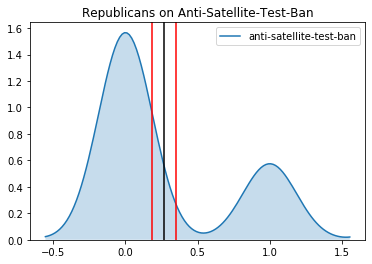

In [22]:
#Plotting using sns kernel density

import seaborn as sns

def plot_confidence_interval(data, confidence= 0.95):
  sns.kdeplot(rep['anti-satellite-test-ban'], shade=True)
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k')

  plt.title('Republicans on Anti-Satellite-Test-Ban')
  plt.show()

plot_confidence_interval(rep['anti-satellite-test-ban'], confidence=0.95)

In [28]:
# Computing mean and Confidence interval using stats.bayes_mvs

mean_confidence_interval, _, _ = st.bayes_mvs(rep['anti-satellite-test-ban'], alpha=0.95)
mean_confidence_interval

Mean(statistic=0.26851851851851855, minmax=(0.18358393802160433, 0.35345309901543276))

In [29]:
# Compare the value above in comparison to the one computed with a function
CI=confidence_interval(rep['anti-satellite-test-ban'])
CI

(0.26851851851851855, 0.18358393802160433, 0.35345309901543276)

##3) In your own words, summarize the difference between Bayesian and Frequentist statistics

The frequentist statistics is based on the concept of likehood.  This works well with a big sample size because you can get more information that way.  On Bayesian method, prior knowledge is considered in the computation. This works well for multiple number of testing as opposed to higher number of sample size. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective

In [33]:
# Using the Forest Data

df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
print(len(df['rain']))
df.head()

517


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [34]:
df[df['RH']<=70]
len(df[df['RH']<=70])

472